Web_Scaraping Shivam singh , Roll No 242211017 , M.tech CSA

In [ ]:
pip install requests beautifulsoup4 pandas matplotlib seaborn


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

BASE_URL = "https://books.toscrape.com/catalogue/page-{}.html"

book_data = []

# Scrape multiple pages (adjust range as needed)
for page in range(1, 6):
    url = BASE_URL.format(page)
    response = requests.get(url)

    if response.status_code != 200:
        print(f"Failed to access {url}")
        continue

    soup = BeautifulSoup(response.text, 'html.parser')
    books = soup.find_all('article', class_='product_pod')

    for book in books:
        title = book.h3.a.attrs['title']
        price = float(book.find('p', class_='price_color').text[2:])  # Remove £ symbol
        availability = book.find('p', class_='instock availability').text.strip()

        # Extract category (navigate to book's individual page)
        book_url = "https://books.toscrape.com/catalogue/" + book.h3.a.attrs['href']
        book_page = requests.get(book_url)
        book_soup = BeautifulSoup(book_page.text, 'html.parser')
        category = book_soup.find('ul', class_='breadcrumb').find_all('li')[2].text.strip()

        # Extract rating
        rating_class = book.p.attrs['class']
        rating = rating_class[1] if len(rating_class) > 1 else "Not Rated"

        book_data.append([title, category, price, availability, rating])

    time.sleep(1)  # Avoid overwhelming the server

# Convert to DataFrame
df = pd.DataFrame(book_data, columns=['Title', 'Category', 'Price (£)', 'Availability', 'Rating'])

# Save to CSV
df.to_csv('books_data.csv', index=False)

print(df.head())


                                   Title            Category  Price (£)  \
0                   A Light in the Attic              Poetry      51.77   
1                     Tipping the Velvet  Historical Fiction      53.74   
2                             Soumission             Fiction      50.10   
3                          Sharp Objects             Mystery      47.82   
4  Sapiens: A Brief History of Humankind             History      54.23   

  Availability Rating  
0     In stock  Three  
1     In stock    One  
2     In stock    One  
3     In stock   Four  
4     In stock   Five  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('books_data.csv')

# Convert price column to float
df['Price (£)'] = df['Price (£)'].astype(float)


<ipython-input-21-fc3bad86ddc7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, palette='coolwarm')


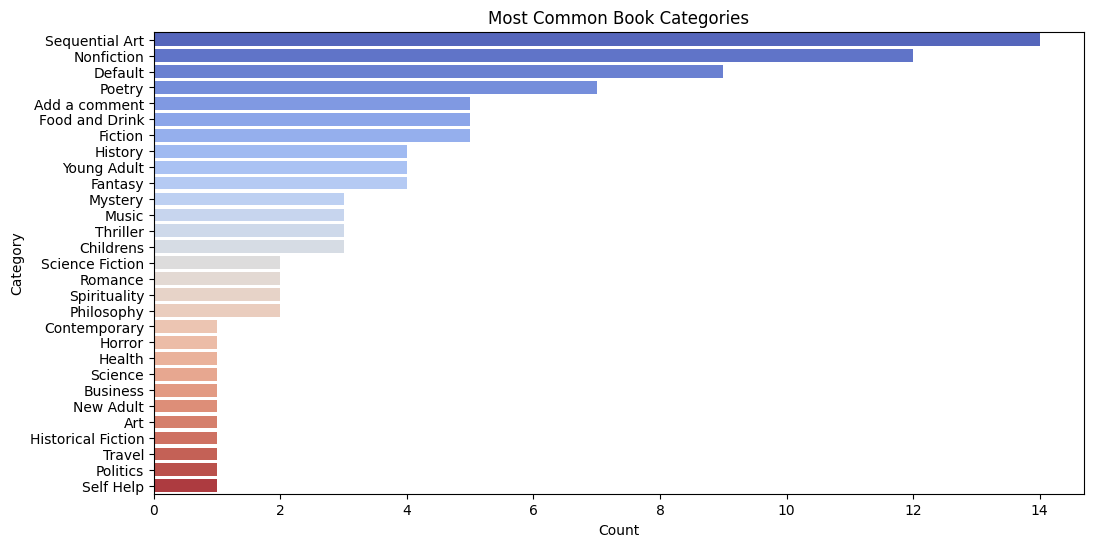

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, palette='coolwarm')
plt.xlabel("Count")
plt.ylabel("Category")
plt.title("Most Common Book Categories")
plt.show()


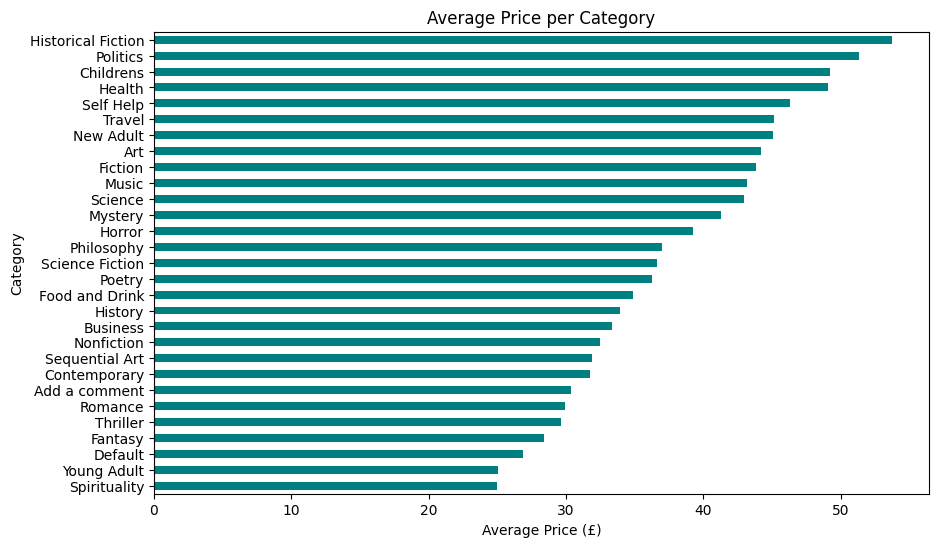

In [ ]:
avg_price_per_category = df.groupby('Category')['Price (£)'].mean().sort_values()
avg_price_per_category.plot(kind='barh', figsize=(10,6), color='teal')
plt.xlabel("Average Price (£)")
plt.ylabel("Category")
plt.title("Average Price per Category")
plt.show()


<ipython-input-23-ea7a3f89e609>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Rating'], order=df['Rating'].value_counts().index, palette='viridis')


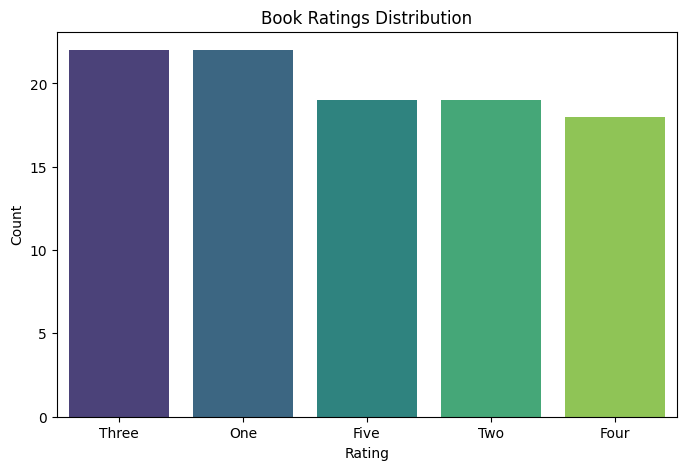

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Rating'], order=df['Rating'].value_counts().index, palette='viridis')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Book Ratings Distribution")
plt.show()


<ipython-input-24-90fdacd85f57>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Availability'], palette='Set2')


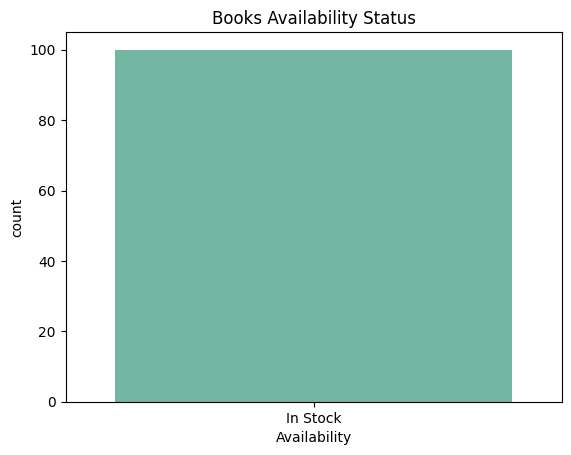

In [ ]:
df['Availability'] = df['Availability'].apply(lambda x: 'In Stock' if 'In stock' in x else 'Out of Stock')
sns.countplot(x=df['Availability'], palette='Set2')
plt.title("Books Availability Status")
plt.show()


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

BASE_URL = "https://books.toscrape.com/catalogue/page-{}.html"

book_data = []

page = 1
while True:
    url = BASE_URL.format(page)
    response = requests.get(url)

    if response.status_code != 200:
        break  # Stop if no more pages

    soup = BeautifulSoup(response.text, 'html.parser')
    books = soup.find_all('article', class_='product_pod')

    for book in books:
        title = book.h3.a.attrs['title']
        price = float(book.find('p', class_='price_color').text[2:])  # Remove £ symbol
        availability = 'In Stock' if 'In stock' in book.find('p', class_='instock availability').text.strip() else 'Out of Stock'

        # Extract rating
        rating_class = book.p.attrs['class']
        rating = rating_class[1] if len(rating_class) > 1 else "Not Rated"

        # Extract category (navigate to book's individual page)
        book_url = "https://books.toscrape.com/catalogue/" + book.h3.a.attrs['href']
        book_page = requests.get(book_url)
        book_soup = BeautifulSoup(book_page.text, 'html.parser')
        category = book_soup.find('ul', class_='breadcrumb').find_all('li')[2].text.strip()

        book_data.append([title, price, rating, availability, category])

    print(f"Scraped Page {page}")
    page += 1
    time.sleep(1)  # Avoid overwhelming the server

# Convert to DataFrame
df = pd.DataFrame(book_data, columns=['Title', 'Price (£)', 'Rating', 'Availability', 'Category'])

# Save to CSV
df.to_csv('books_data.csv', index=False)

print("Scraping Complete! Data saved to books_data.csv")


Scraped Page 1
Scraped Page 2
Scraped Page 3
Scraped Page 4
Scraped Page 5
Scraped Page 6
Scraped Page 7
Scraped Page 8
Scraped Page 9
Scraped Page 10
Scraped Page 11
Scraped Page 12
Scraped Page 13
Scraped Page 14
Scraped Page 15
Scraped Page 16
Scraped Page 17
Scraped Page 18
Scraped Page 19
Scraped Page 20
Scraped Page 21
Scraped Page 22
Scraped Page 23
Scraped Page 24
Scraped Page 25
Scraped Page 26
Scraped Page 27
Scraped Page 28
Scraped Page 29
Scraped Page 30
Scraped Page 31
Scraped Page 32
Scraped Page 33
Scraped Page 34
Scraped Page 35
Scraped Page 36
Scraped Page 37
Scraped Page 38
Scraped Page 39
Scraped Page 40
Scraped Page 41
Scraped Page 42
Scraped Page 43
Scraped Page 44
Scraped Page 45
Scraped Page 46
Scraped Page 47
Scraped Page 48
Scraped Page 49
Scraped Page 50
Scraping Complete! Data saved to books_data.csv


In [ ]:
df = pd.read_csv('books_data.csv')

avg_price_per_category = df.groupby('Category')['Price (£)'].mean().sort_values()
print(avg_price_per_category)


Category
Crime                 10.970000
Academic              13.120000
Adult Fiction         15.360000
Paranormal            15.400000
Erotica               19.190000
Historical            22.830000
Food and Drink        31.414667
Thriller              31.433636
Mystery               31.719062
Business              32.460000
Religion              32.567143
Childrens             32.638276
Science               33.088571
Humor                 33.501000
Philosophy            33.558182
Historical Fiction    33.644231
Biography             33.662000
Science Fiction       33.802500
Romance               33.933714
Psychology            34.218571
Nonfiction            34.260182
Christian Fiction     34.385000
Default               34.392697
Sequential Art        34.572267
Spirituality          35.098333
Young Adult           35.449074
Music                 35.636923
Add a comment         35.796418
Short Stories         35.880000
Horror                35.949412
Poetry                35.974211

In [ ]:
most_common_rating = df['Rating'].value_counts().idxmax()
print(f"The most frequent rating is: {most_common_rating}")


The most frequent rating is: One


In [ ]:
most_common_category = df['Category'].value_counts().idxmax()
print(f"The category with the highest number of books is: {most_common_category}")


The category with the highest number of books is: Default


In [ ]:
most_common_category = df['Category'].value_counts().idxmax()
print(f"The category with the highest number of books is: {most_common_category}")


The category with the highest number of books is: Default


In [ ]:
most_common_category = df['Category'].value_counts().idxmax()
print(f"The category with the highest number of books is: {most_common_category}")



The category with the highest number of books is: Default


<ipython-input-31-a6ad2222cc6c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, palette='coolwarm')


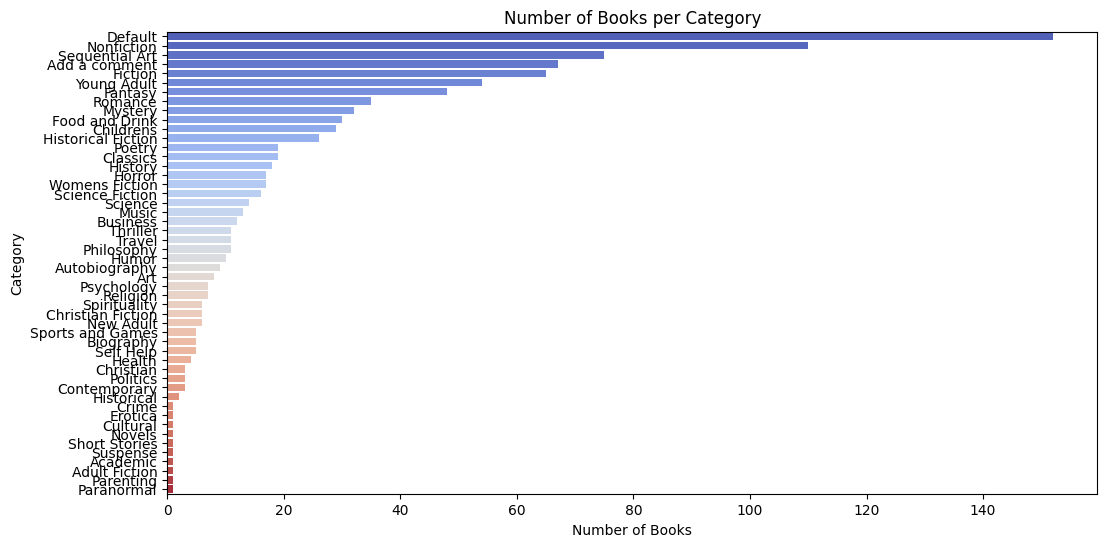

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, palette='coolwarm')
plt.xlabel("Number of Books")
plt.ylabel("Category")
plt.title("Number of Books per Category")
plt.show()
